In [5]:
# Librerías
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LinearRegression

In [4]:
# Generar conjunto de datos
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

print('La longitud de X es: ', len(X))

La longitud de X es:  100


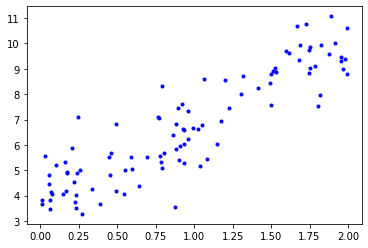

In [6]:
# Visualizar los datos
plt.plot(X, y, "b.")
plt.show()

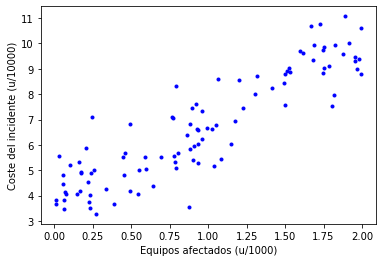

In [7]:
plt.plot(X, y, "b.")
plt.xlabel("Equipos afectados (u/1000)")
plt.ylabel("Coste del incidente (u/10000)")
plt.show()

In [8]:
# Modificación del conjunto de datos
# Flatten = Convierte una matriz en una lista de una dimensión
data = {"n_equipos_afectados": X.flatten(), "coste": y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,n_equipos_afectados,coste
0,0.387949,3.679054
1,0.102667,5.225938
2,1.823545,9.923139
3,1.027827,6.626228
4,0.156750,5.310728
5,1.036660,5.170167
6,0.452020,4.820832
7,1.782347,9.119985
8,0.489966,4.192694
9,1.499117,7.563056


In [9]:
# Escalado del número de equipos afectados
df['n_equipos_afectados'] = df['n_equipos_afectados'] * 1000
df['n_equipos_afectados'] = df['n_equipos_afectados'].astype('int')
# Escalado del coste del incidente
df['coste'] = df['coste'] * 10000
df['coste'] = df['coste'].astype('int')
df.head(10)

,n_equipos_afectados,coste
0,387,36790
1,102,52259
2,1823,99231
3,1027,66262
4,156,53107
5,1036,51701
6,452,48208
7,1782,91199
8,489,41926
9,1499,75630


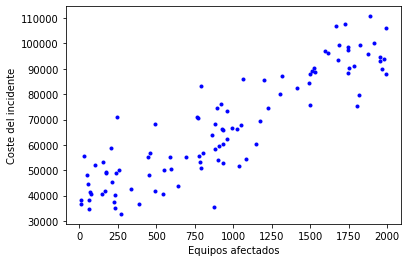

In [10]:
# Representación gráfica de los datos
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()

In [12]:
# Construcción del modelo
lin_reg = LinearRegression()
# Entrenamiento del modelo
lin_reg.fit(df['n_equipos_afectados'].values.reshape(-1,1), df['coste'].values)

LinearRegression()

In [13]:
# Parámetro theta0 (Intercepto eje Y)
lin_reg.intercept_

38042.0113227822

In [14]:
# Parametro theta1 (Coeficiente de la pendiente)
lin_reg.coef_

array([30.58546056])

In [17]:
# Generar recta de regresión
X_min_max = np.array([[df["n_equipos_afectados"].min()], [df["n_equipos_afectados"].max()]])
y_train_pred = lin_reg.predict(X_min_max)

array([38378.4513889 , 98907.07782907])

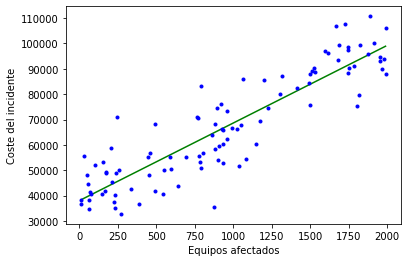

In [16]:
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()

In [21]:
# Predicción de nuevos datos
x_new = np.array([[1800]])
coste = lin_reg.predict(x_new)
print("El coste del incidente para un número de equipos afectados de 1200 es:", coste)


El coste del incidente para un número de equipos afectados de 1200 es: [93095.84032344]


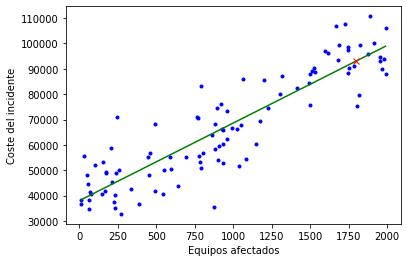

In [32]:
# Predicción de nuevos datos
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(x_new, coste, "rx")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()